In [38]:
# Import Required Libraries
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset,DataLoader,random_split
import lenet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
model = lenet.LeNet()

In [28]:
np.random.seed(0)
torch.manual_seed(0)

In [47]:
# Set Device to CUDA or CPU based on availability
device = "cuda" if torch.cuda.is_available() else "cpu"

In [22]:
class DigitsDataset(Dataset):   
    def __init__(self,train_dir,transform):
        # Data Loading
        self.train_dir = train_dir
        self.dataset = pd.read_csv(train_dir)
        self.transform = transform
        
    def __getitem__(self,idx):
        # Dataset[0]
        self.target = self.dataset.iloc[idx,0]
        self.image = self.dataset.iloc[idx,1:].values
        # Convert Array to Image
        self.image = self.image.reshape((28,28))
        self.image = self.transform(self.image)
        
        return self.image,self.target
    
    def __len__(self):
        # Returns Number of Samples
        return self.dataset.shape[0]

SIZE OF DATASET: 42000
torch.Size([1, 32, 32])


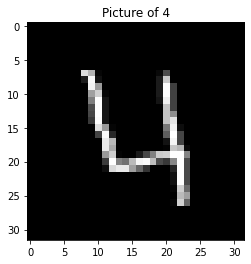

In [76]:
# Create an Object of DigitsDataset Class
dataset = DigitsDataset('train.csv',transform = transforms.Compose(
                                                    [transforms.ToTensor(),transforms.Pad(2)]))
print(f'SIZE OF DATASET: {(len(dataset))}')
# Visualise 1 sample
image,target = dataset[3]
print(image.shape)
plt.imshow(np.transpose(image,(1,2,0)),cmap='gray')
plt.title(f'Picture of {target}')
plt.show()

In [77]:
train_dataset,val_dataset = random_split(dataset,(32000,10000))

In [78]:
train_dl = DataLoader(dataset=train_dataset,shuffle=True,batch_size=4,num_workers=2)
val_dl = DataLoader(dataset=val_dataset,shuffle=True,batch_size=4,num_workers=2)

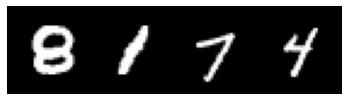

In [79]:
# get some random training images
dataiter = iter(train_dl)
images, labels = dataiter.next()
plt.imshow(np.transpose(torchvision.utils.make_grid(images),(1,2,0)))
plt.axis('off')
plt.show()

In [82]:
epochs = 5
criterion = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(),lr=0.001)
model = model.to(device)

In [103]:
out = model(images.float())
print(out.shape)

torch.Size([4, 10])


In [107]:
for e in range(epochs):
    model.train()
    running_loss = 0.0
    for idx,(imgs,labels) in enumerate(train_dl,0):
        imgs = imgs.to(device)
        labels = labels.to(device)
        
        opt.zero_grad()
        
        out = model(imgs.float())
        loss = criterion(out,labels)
        loss.backward()
        opt.step()
        
        running_loss += loss.item()
        if idx%2000 == 0:
                print('[%d, %5d] loss: %.3f' %(e + 1, idx + 1, running_loss / 2000))
print("Training Over")

[1,     1] loss: 0.000
[1,  2001] loss: 0.065
[1,  4001] loss: 0.133
[1,  6001] loss: 0.210
[2,     1] loss: 0.000
[2,  2001] loss: 0.067
[2,  4001] loss: 0.132
[2,  6001] loss: 0.208
[3,     1] loss: 0.000
[3,  2001] loss: 0.057
[3,  4001] loss: 0.122
[3,  6001] loss: 0.179
[4,     1] loss: 0.000
[4,  2001] loss: 0.056
[4,  4001] loss: 0.121
[4,  6001] loss: 0.182
[5,     1] loss: 0.000
[5,  2001] loss: 0.075
[5,  4001] loss: 0.118
[5,  6001] loss: 0.181
Training Over


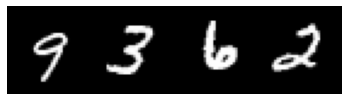

In [113]:
dataiter = iter(val_dl)
images, labels = dataiter.next()

# print images
plt.imshow(np.transpose(torchvision.utils.make_grid(images),(1,2,0)))
plt.axis('off')
plt.show()

In [122]:
outputs = model(images.float())
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % range(10)[predicted[j]] for j in range(4)))

Predicted:      9     3     6     2
